<a href="https://colab.research.google.com/github/R-Owino/KNN-Naive-Bayes/blob/main/Moringa_Data_Science_Core_W9_Independent_Project_2022_05_Rehema_Owino_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

## 1. Defining the question

### a) Specifying the question 
Using the data provided, classify whether a mail is spam or ham applying the Naive Bayes classification algorithm.

### b) Defining the metric for success
The success will be determined if we can get the best split for the most accurate score after feature selection. 

### c) Understanding the context
The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography, the list goes on. Correctly identifying an email as spam can save an individual or even a company a lot of money, time and embarassments.
Using Naive Bayes classification algorithm, I will be classifying the data provided as either spam or ham.








### d) Recording the experimental design 
1. Load and read the data
2. Clean the data
3. Perform exloratory analysis and feature selection
4. Build the model
5. Conclude 

### e) Data relevance
The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

## 2. Reading the data 

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [72]:
url = 'https://drive.google.com/file/d/1stippcFtK0YpsrybqEE63rGrCvCQO7u_/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id='+ file_id
df = pd.read_csv(dwn_url)

## 3. Checking the data 

In [73]:
# Determining the no. of records in our dataset
print('There are ' +str(df.shape[0])+ ' rows and ' +str(df.shape[1])+ ' columns in the dataset')

There are 4600 rows and 58 columns in the dataset


In [74]:
# Previewing the top of our dataset
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [75]:
# Previewing the bottom of our dataset
df.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [76]:
# Checking whether each column has an appropriate datatype
df.dtypes

0         float64
0.64      float64
0.64.1    float64
0.1       float64
0.32      float64
0.2       float64
0.3       float64
0.4       float64
0.5       float64
0.6       float64
0.7       float64
0.64.2    float64
0.8       float64
0.9       float64
0.10      float64
0.32.1    float64
0.11      float64
1.29      float64
1.93      float64
0.12      float64
0.96      float64
0.13      float64
0.14      float64
0.15      float64
0.16      float64
0.17      float64
0.18      float64
0.19      float64
0.20      float64
0.21      float64
0.22      float64
0.23      float64
0.24      float64
0.25      float64
0.26      float64
0.27      float64
0.28      float64
0.29      float64
0.30      float64
0.31      float64
0.32.2    float64
0.33      float64
0.34      float64
0.35      float64
0.36      float64
0.37      float64
0.38      float64
0.39      float64
0.40      float64
0.41      float64
0.42      float64
0.778     float64
0.43      float64
0.44      float64
3.756     float64
61        

## 4. Tidying the dataset 

In [77]:
# Checking for Outliers using IQR 
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
print(IQR)

0           0.00000
0.64        0.00000
0.64.1      0.42000
0.1         0.00000
0.32        0.38250
0.2         0.00000
0.3         0.00000
0.4         0.00000
0.5         0.00000
0.6         0.16000
0.7         0.00000
0.64.2      0.80000
0.8         0.00000
0.9         0.00000
0.10        0.00000
0.32.1      0.10000
0.11        0.00000
1.29        0.00000
1.93        2.64000
0.12        0.00000
0.96        1.27000
0.13        0.00000
0.14        0.00000
0.15        0.00000
0.16        0.00000
0.17        0.00000
0.18        0.00000
0.19        0.00000
0.20        0.00000
0.21        0.00000
0.22        0.00000
0.23        0.00000
0.24        0.00000
0.25        0.00000
0.26        0.00000
0.27        0.00000
0.28        0.00000
0.29        0.00000
0.30        0.00000
0.31        0.00000
0.32.2      0.00000
0.33        0.00000
0.34        0.00000
0.35        0.00000
0.36        0.11000
0.37        0.00000
0.38        0.00000
0.39        0.00000
0.40        0.00000
0.41        0.18800


- Removing the outliers will  greatly impact the shape of the dataset, therefore none will be removed.

In [78]:
# Checking for Anomalies - duplicates
df.duplicated().any()

True

In [79]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")

# Print the resultant Dataframe
duplicate

Duplicate Rows :


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
25,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.196,0.000,0.392,0.196,0.0,5.466,22,82,1
102,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
103,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
104,0.0,0.0,0.64,0.0,0.0,0.64,0.0,0.0,0.0,0.0,...,0.094,0.189,0.284,0.662,0.000,0.0,10.068,131,292,1
105,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.305,0.611,0.000,1.529,0.000,0.0,5.500,22,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4440,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.036,0.147,0.000,0.147,0.000,0.0,2.587,55,282,0
4536,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,6,0
4540,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,1.000,1,2,0


In [80]:
# dropping the duplicates - this is about 11% of the data 
df = df.drop_duplicates()
df.shape

(4209, 58)

In [81]:
# Identifying the Missing Data
print('There are ' +str(df.isnull().sum().sum())+ ' missing values')

There are 0 missing values


## 5. Exploratory Analysis

In [82]:
df.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,...,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,...,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706000,44.000000,273.00000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.00000,1.000000


In [83]:
corr = df.corr()
corr

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,...,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126,0.129321
0.64,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,...,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
0.64.1,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,...,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967,0.172193
0.1,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,...,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
0.32,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,...,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230117
0.2,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,...,-0.021758,-0.011628,-0.016743,0.058173,0.105903,0.020405,-0.013559,0.065714,0.063402,0.212455
0.3,0.011037,0.077468,0.028630,0.014286,0.135958,0.046844,1.000000,0.033675,0.049216,0.055670,...,-0.034092,-0.061357,-0.029478,0.051036,0.067215,0.049300,0.039171,0.050828,-0.017082,0.334605
0.4,-0.004392,0.013781,0.007263,0.003798,0.023410,0.079683,0.033675,1.000000,0.106872,0.079023,...,-0.028986,-0.042785,-0.021393,0.029069,0.053550,-0.008128,0.009974,0.035606,0.036894,0.200780
0.5,0.103818,0.053525,0.077618,-0.001044,0.014482,0.097012,0.049216,0.106872,1.000000,0.123341,...,-0.015016,-0.037420,0.017308,0.035985,0.152436,-0.002084,0.110786,0.166304,0.233199,0.221591
0.6,0.040799,0.184441,0.025201,-0.003849,0.027232,0.010068,0.055670,0.079023,0.123341,1.000000,...,0.006757,-0.005008,0.003785,0.031657,0.077378,0.034473,0.073125,0.101552,0.078587,0.131822


In [84]:
# sum of the correlations for each variable as absolute values
corr_df = df.corr(method='pearson')
corr_abs_sum = corr_df.abs().sum()

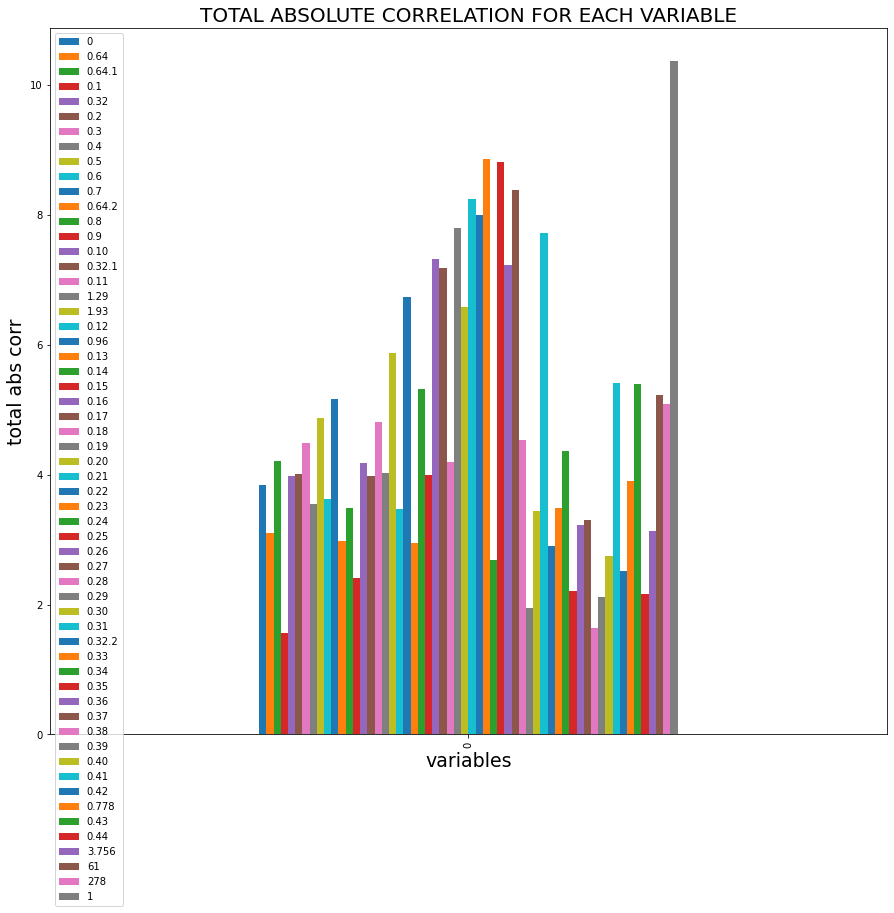

In [85]:
total_abs_corr = pd.DataFrame(corr_abs_sum).T

total_abs_corr.plot.bar(figsize=(15,13)) #(kind='bar', width=0.65, rot=0)
plt.title("TOTAL ABSOLUTE CORRELATION FOR EACH VARIABLE", fontsize=20)
plt.xlabel('variables', fontsize = 19)
plt.ylabel('total abs corr', fontsize = 19)
plt.legend(loc="upper left")

### Feature Selection 

In [86]:
# Removing the highly correlated features because they contribute very less in predicting the output but increses the computational cost

# note that the correlation matrix is a mirror image about the diagonal, whose elements are 1
# we can use either the upper or lower triangle but not including the diagonal
# using the upper triangle:

upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
print(upper_tri)

         0      0.64    0.64.1       0.1      0.32       0.2       0.3  \
0      NaN  0.034114  0.063267  0.005384  0.021740  0.055040  0.011037   
0.64   NaN       NaN  0.027609 -0.008936  0.036983  0.005623  0.077468   
0.64.1 NaN       NaN       NaN -0.019895  0.065681  0.066608  0.028630   
0.1    NaN       NaN       NaN       NaN  0.000256 -0.009167  0.014286   
0.32   NaN       NaN       NaN       NaN       NaN  0.041392  0.135958   
0.2    NaN       NaN       NaN       NaN       NaN       NaN  0.046844   
0.3    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
0.4    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
0.5    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
0.6    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
0.7    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
0.64.2 NaN       NaN       NaN       NaN       NaN       NaN       NaN   
0.8    NaN       NaN       NaN       N

In [87]:
# Dropping the columns with high correlation of above 0.85
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
print(to_drop)
df = df.drop('0.25', axis=1)
df.head()

['0.25']


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [88]:
# Data reduction using LDA

# splitting into feature and target 
X = df.drop(['1'], axis = 1).values
y = df['1'].values

# applying LDA with all the components
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
clf = lda.fit_transform(X, y)

## 6. Implementing the solution 

### Perfoming predictive analysis using various test sizes

In [89]:
# 80-20 split using the gaussian classifier

# splitting into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# standarizing
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fitting the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# making prediction
y_pred = clf.predict(X_test)

In [90]:
# comparing 
comparison_df = pd.DataFrame({'actual':y_test,'predict':y_pred})
comparison_df.describe()

,actual,predict
count,842.000000,842.000000
mean,0.412114,0.566508
std,0.492508,0.495851
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [91]:
# Performance evaluation 
print('accuracy score: ',accuracy_score(y_test,y_pred))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))

accuracy score:  0.8171021377672208
confusion matrix:
 [[353 142]
 [ 12 335]]


In [92]:
# 70-30 split using the gaussian classifier

# splitting into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# standarizing
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fitting the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# making prediction
y_pred = clf.predict(X_test)

In [93]:
# comparing 
comparison_df = pd.DataFrame({'actual':y_test,'predict':y_pred})
comparison_df.describe()

,actual,predict
count,1263.000000,1263.000000
mean,0.416469,0.558195
std,0.493168,0.496799
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [94]:
# Performance evaluation 
print('accuracy score: ',accuracy_score(y_test,y_pred))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))

accuracy score:  0.8266033254156769
confusion matrix:
 [[538 199]
 [ 20 506]]


In [95]:
# 60-40 split using the gaussian classifier

# splitting into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# standarizing
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fitting the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# making prediction
y_pred = clf.predict(X_test)

In [96]:
# comparing 
comparison_df = pd.DataFrame({'actual':y_test,'predict':y_pred})
comparison_df.describe()

,actual,predict
count,1684.000000,1684.000000
mean,0.409739,0.546318
std,0.491932,0.497998
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [97]:
# Performance evaluation 
print('accuracy score: ',accuracy_score(y_test,y_pred))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))

accuracy score:  0.831353919239905
confusion matrix:
 [[737 257]
 [ 27 663]]


- 80-20 split gives the lowest accuracy of 81%, with 353 and 335 correctly predicted records.
- 70-30 split gives an accuracy of 82%, with 538 and 506 correctly predicted records.
- 60-40 split gives the highest accuracy of 83%, with 737 and 633 correctly predicted records.

## 7. Follow-up questions 

### a) Did we have the right data
Yes 

### b) Do we need other data to answer our question
A description of columns data 

### c) Did we have the right question
Yes

## 8. Conclusion 
Being able to correctly filter mails as spam and not spam is essential in our world today. Using the data provided, filtering the mails using Gaussian Naive Bayes algorithm gave the most accurate score when the data was split into 60-40. This is a good classification result.